1.2 Modeling a Fishing scenario

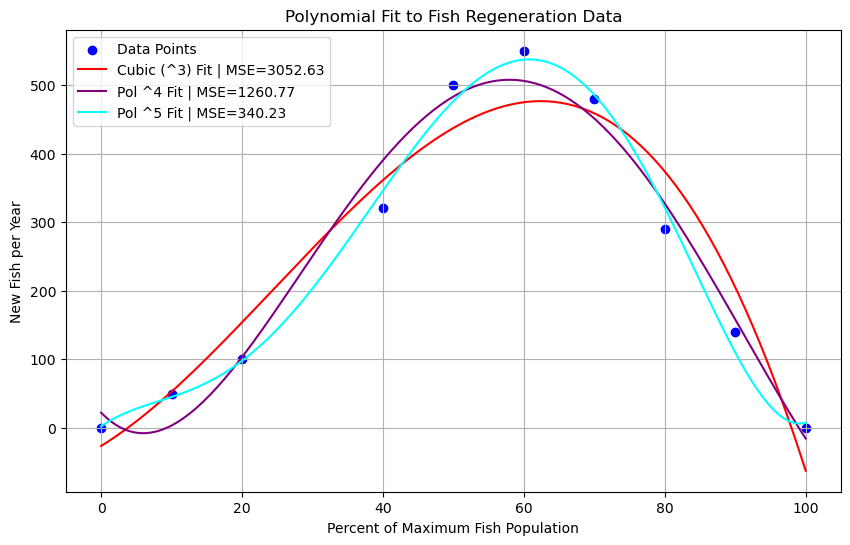

In [11]:
import numpy as np
import matplotlib.pyplot as plt


x = np.array([60,50,70,40,80,90,20,10,0,100])
y = np.array([550,500,480,320,290,140,100,50,0,0])

# Fit polynomials
coeffs3 = np.polyfit(x, y, 3)
coeffs4 = np.polyfit(x, y, 4)
coeffs5 = np.polyfit(x, y, 5)

# Create functions
poly3 = np.poly1d(coeffs3)
poly4 = np.poly1d(coeffs4)
poly5 = np.poly1d(coeffs5)

# Compute predictions
y_pred3 = poly3(x)
y_pred4 = poly4(x)
y_pred5 = poly5(x)

# Compute MSE
mse3 = np.mean((y - y_pred3)**2)
mse4 = np.mean((y - y_pred4)**2)
mse5 = np.mean((y - y_pred5)**2)

# Generate points for smooth curve
x_fit = np.linspace(min(x), max(x), 200)
y_fit3 = poly3(x_fit)
y_fit4 = poly4(x_fit)
y_fit5 = poly5(x_fit)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_fit, y_fit3, color='red', label=f'Cubic (^3) Fit | MSE={mse3:.2f}')
plt.plot(x_fit, y_fit4, color='purple', label=f'Pol ^4 Fit | MSE={mse4:.2f}')
plt.plot(x_fit, y_fit5, color='cyan', label=f'Pol ^5 Fit | MSE={mse5:.2f}')

plt.xlabel("Percent of Maximum Fish Population")
plt.ylabel("New Fish per Year")
plt.title("Polynomial Fit to Fish Regeneration Data")
plt.legend()
plt.grid(True)
plt.show()

In [16]:
print(poly3)

           3          2
-0.002517 x + 0.1849 x + 6.32 x - 26.24


b

Fitted parameter a: 31.11, b:20.28 


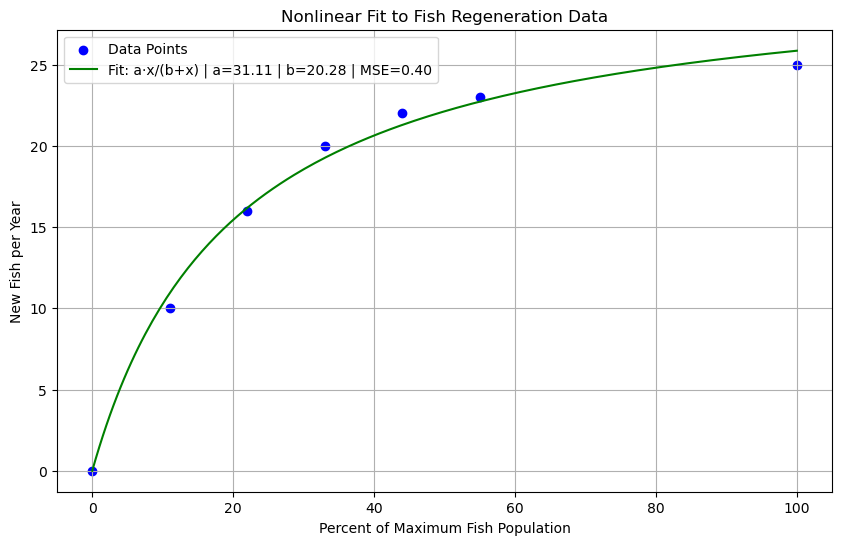

In [15]:

from scipy.optimize import curve_fit

x = np.array([0,11,22,33,44,55,100])
y = np.array([0,10,16,20,22,23,25])
# Define the function to fit
def model_func(x, a,b):
    return a * x / (b + x)

# Fit the function to data
params, _ = curve_fit(model_func, x, y)

# Extract parameter
a_fit, b_fit = params[0], params[1]
print(f"Fitted parameter a: {a_fit:.2f}, b:{b_fit:.2f} ")

# Predict values
y_model = model_func(x, a_fit, b_fit)
mse_model = np.mean((y - y_model)**2)

# Plot
x_smooth = np.linspace(min(x), max(x), 200)
y_smooth = model_func(x_smooth, a_fit, b_fit)

plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', label='Data Points')
plt.plot(x_smooth, y_smooth, color='green', label=f'Fit: a·x/(b+x) | a={a_fit:.2f} | b={b_fit:.2f} | MSE={mse_model:.2f}')
plt.xlabel("Percent of Maximum Fish Population")
plt.ylabel("New Fish per Year")
plt.title("Nonlinear Fit to Fish Regeneration Data")
plt.legend()
plt.grid(True)
plt.show()



Question d

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import solve_ivp

def f_ode(y, x):
    dx= -1.0068*x^3 + 3.698*x^2 + 6.32*x - 1.312 - y*1.5555/(20.28-20*x)
    return dx

x0 = [1000]
yspan = (0, 20)
teval = np.linspace(yspan[0], yspan[1], 1000)
sol = solve_ivp(f_ode, yspan, x0, t_eval=teval)
y = sol.t
x = sol.y[0]
plt.plot(y, x, label='x(t)')
plt.plot(y, y, label='y')
plt.legend()
plt.xlabel('y')
plt.show()



TypeError: ufunc 'bitwise_xor' not supported for the input types, and the inputs could not be safely coerced to any supported types according to the casting rule ''safe''

d)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import fsolve

# Define the regeneration function f_r(x)
def R(x):
    return -1.0068 * x*3 + 3.698 * x*2 + 6.32 * x - 1.312

# Define the fishing loss function f_e(x, y)
def L(x, y):
    return y * 1.5555 / (20.28 - 20 * x)

# Define the full differential equation f(x, y)
def f(x, y):
    return R(x) - L(x, y)

# Function to find equilibrium points for a given y
def find_equilibria(y, x_guesses):
    equilibria = []
    for guess in x_guesses:
        try:
            root = fsolve(f, guess, args=(y))[0]
            if 0 < root < 1 and not any(np.isclose(root, eq, atol=1e-3) for eq in equilibria):
                equilibria.append(root)
        except:
            continue
    return sorted(equilibria)

# Define the fishing levels to analyze
final_y_vals = [0, 2, 5, 10, 20]
x_initial_guesses = np.linspace(0.01, 0.99, 30)

# Compute equilibria
final_equilibria_dict = {}
for y in final_y_vals:
    final_equilibria_dict[y] = find_equilibria(y, x_initial_guesses)

# Create a multiplot (subplot) figure
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 8))
axes = axes.flatten()

for i, y in enumerate(final_y_vals):
    ax = axes[i]
    x_range = np.linspace(0.01, 0.99, 1000)
    dxdt = f(x_range, y)
    ax.plot(x_range, dxdt, linewidth=2)
    ax.axhline(0, color='black', linestyle='--')

    # Annotate equilibrium points (excluding those near x=0)
    if np.any(np.diff(np.sign(dxdt)) != 0):
        eq_points = [x_eq for x_eq in final_equilibria_dict[y] if not np.isclose(x_eq, 0.0, atol=1e-3)]
        for x_eq in eq_points:
            ax.text(x_eq, 0.01, f'{x_eq:.3f}', ha='center', fontsize=9)

    ax.set_title(f'y = {y} boats')
    ax.set_xlabel('Fish population (x)')
    ax.set_ylabel(r'$\dot{x}$')
    ax.grid(True)

# Remove any unused subplots
if len(final_y_vals) < len(axes):
    for j in range(len(final_y_vals), len(axes)):
        fig.delaxes(axes[j])

# Overall title and layout
fig.suptitle(r'Dynamics $\dot{x} = f(x, y)$ for Various Fishing Levels', fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()